In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from random import shuffle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
import joblib

In [7]:
## Data loading
df = pd.read_csv("../dataset/train.csv")
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,Doris,55,F,N,N,2.0,96207.57,117.0,Unknown,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,CST_136670,Luciana,31,F,N,Y,0.0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,Jessica,27,F,N,Y,0.0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,Tessa,32,M,Y,N,0.0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


In [8]:
df.default_in_last_6months.unique().min()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

### Data Clean - Missing Value

In [10]:
# Check the dataset distribution and replace with mean or median
df.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

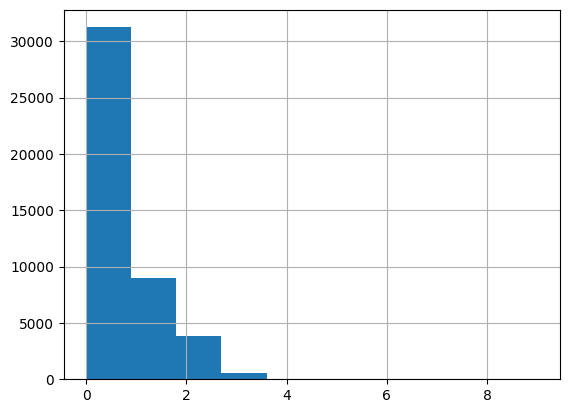

In [11]:
df.no_of_children.hist()
df.no_of_children.fillna(np.median(df.no_of_children.dropna()), inplace=True)

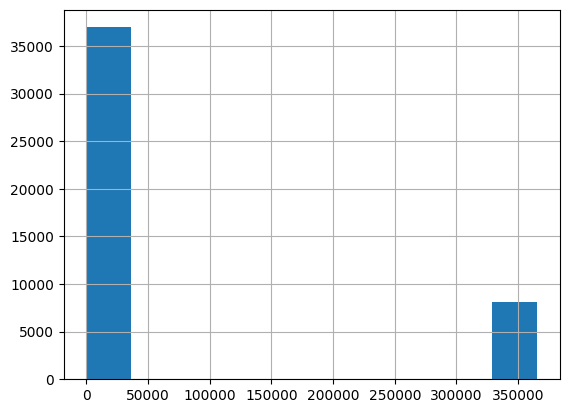

In [12]:
df.no_of_days_employed.hist()
df.no_of_days_employed.fillna(np.median(df.no_of_days_employed.dropna()), inplace=True)

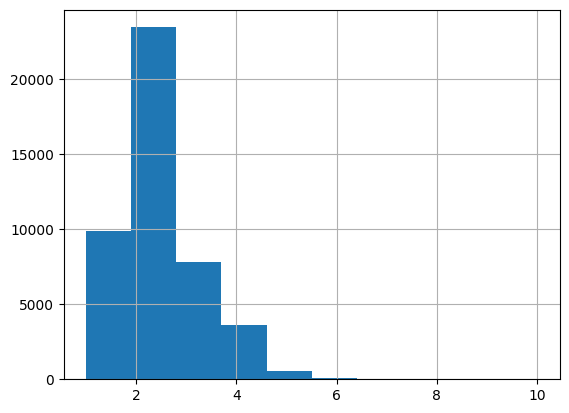

In [13]:
df.total_family_members.hist()
df.total_family_members.fillna(np.median(df.total_family_members.dropna()), inplace=True)

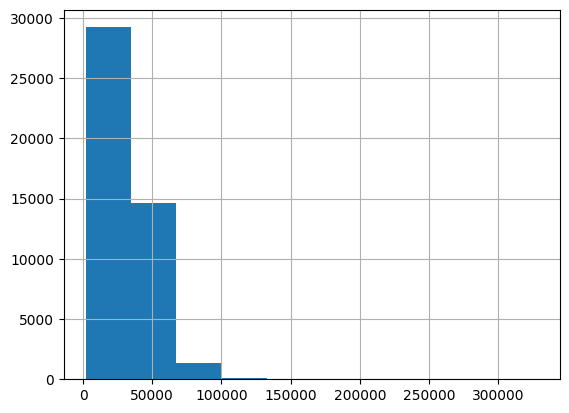

In [14]:
df.yearly_debt_payments.hist()
df.yearly_debt_payments.fillna(np.median(df.yearly_debt_payments.dropna()), inplace=True)

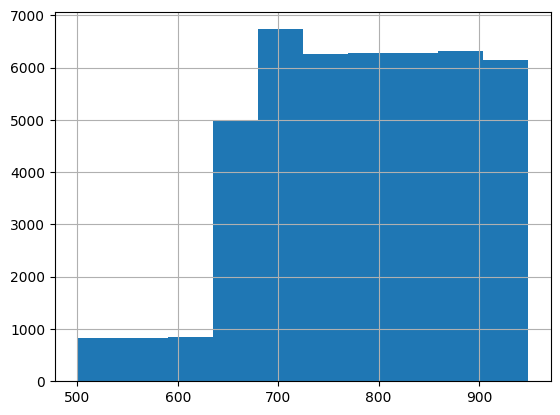

In [15]:
df.credit_score.hist()
df.credit_score.fillna(np.median(df.credit_score.dropna()), inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           45528 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45528 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45528 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45528 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [17]:
df.owns_car.fillna(df.owns_car.mode().values[0],inplace=True)
df.migrant_worker.fillna(df.migrant_worker.mode().values[0],inplace=True)

### EDA

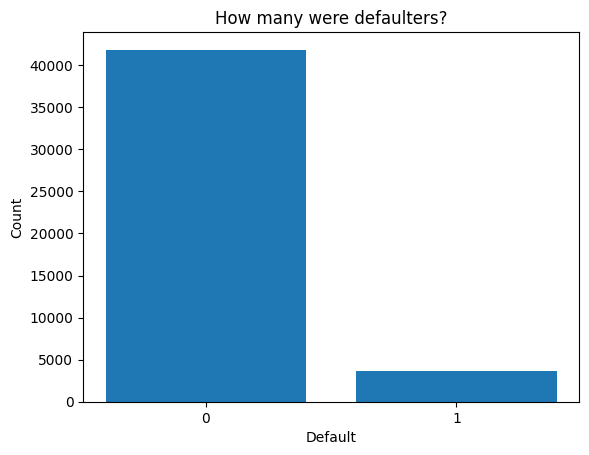

In [18]:
# How many are defaulted 

un, count = np.unique(df.credit_card_default, return_counts=True)
un = [str(int(i)) for i in un]
plt.bar(un, count)
plt.xlabel("Default")
plt.ylabel("Count")
plt.title("How many were defaulters?")
plt.show()

### Data Engineering

In [19]:
###  New Features 1  - cash_balance

df['cash_balance'] = (df.net_yearly_income - df.yearly_debt_payments)
df['employment_years'] = (df.no_of_days_employed / 365)
df['total_income'] = df.net_yearly_income * df.employment_years


In [20]:
## Profit category

def get_profit_category(value):
    if value < 0 :
        return "Loss"
    else:
        return "Profit"


df["in_profit"] = [get_profit_category(i) for i in df["cash_balance"].values]


In [21]:
# Convert categorical column data type to categorical.

cols = ['migrant_worker']

for col in cols:
    df[col] = df[col].astype(object)

### Modelling


- Encoding Categorical Values 
- Oversampling using SMOTE with Tomek Links
- Modelling

In [22]:
# Copy data
df_train = df.copy()

# Drop data that is not required
df_train.drop(['name','customer_id'], inplace = True, axis = 1)

### One Hot Encoding categorical values

Each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. 

In [23]:
df_num_train = df_train.select_dtypes(exclude=[object])
df_cat_train = df_train.select_dtypes(include=[object])

In [24]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(df_cat_train)

transformed = encoder.transform(df_cat_train)

/opt/miniconda3/envs/data_science/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
df_encoded = pd.DataFrame(transformed, columns=encoder.get_feature_names_out())
df_encoded

,gender_F,gender_M,gender_XNA,owns_car_N,owns_car_Y,owns_house_N,owns_house_Y,occupation_type_Accountants,occupation_type_Cleaning staff,occupation_type_Cooking staff,...,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff,migrant_worker_0.0,migrant_worker_1.0,in_profit_Loss,in_profit_Profit
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
45524,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
45525,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45526,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [26]:
# Combine numerical and categorical features

df_train_processed = pd.merge(df_num_train, df_encoded ,left_index=True,right_index=True, how='inner')
df_train_processed

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,...,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff,migrant_worker_0.0,migrant_worker_1.0,in_profit_Loss,in_profit_Profit
0,46,0.0,107934.04,612.0,1.0,33070.28,18690.93,73,544.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,29,0.0,109862.62,2771.0,2.0,15329.53,37745.19,52,857.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,37,0.0,230153.17,204.0,2.0,48416.60,41598.36,43,650.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,39,0.0,122325.82,11941.0,2.0,22574.36,32627.76,20,754.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,46,0.0,387286.00,1459.0,1.0,38282.95,52950.64,75,927.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,55,2.0,96207.57,117.0,4.0,11229.54,29663.83,82,907.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
45524,31,0.0,383476.74,966.0,2.0,43369.91,139947.16,32,679.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
45525,27,0.0,260052.18,1420.0,2.0,22707.51,83961.83,46,727.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45526,32,0.0,157363.04,2457.0,2.0,20150.10,25538.72,92,805.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Oversampling using SMOTE with Tomek Links

In [27]:
smt = SMOTETomek(random_state=42)

X, y = smt.fit_resample(df_train_processed.drop(["credit_card_default"],axis=1), df_train_processed.credit_card_default)

### Modelling

In [28]:
# Create train test split at 80% train, 20% test

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42 )

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
print("Train Accuracy  : {:.2f}%".format(accuracy_score(rf.predict(X_train),y_train)*100))
print("Test Accuracy   : {:.2f}%".format(accuracy_score(rf.predict(X_test),y_test)*100))
print("Precision       : {:.2f}%".format(precision_score(rf.predict(X_test),y_test)*100))
print("Recall          : {:.2f}%".format(recall_score(rf.predict(X_test),y_test)*100))

Train Accuracy  : 100.00%
Test Accuracy   : 98.88%
Precision       : 98.11%
Recall          : 99.66%


### Confusion Matrix

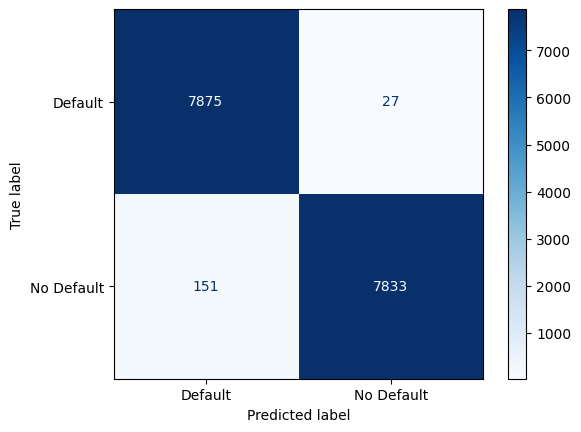

In [34]:
cm = confusion_matrix(y_test,rf.predict(X_test))
disp = ConfusionMatrixDisplay(cm, display_labels=["Default","No Default"])
disp.plot(cmap = 'Blues')

## Saving the model 

In [35]:
joblib.dump(rf, '../models/model.joblib')
joblib.dump(encoder, '../models/encoder.joblib')

['../models/encoder.joblib']

In [39]:
# pickle.dump(rf, open('../models/model.pkl', 'wb'))
# pickle.dump(encoder, open('../models/encoder.pkl', 'wb'))